In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
img=('/content/drive/MyDrive/blood cell/dataset2-master/dataset2-master/images/TRAIN')

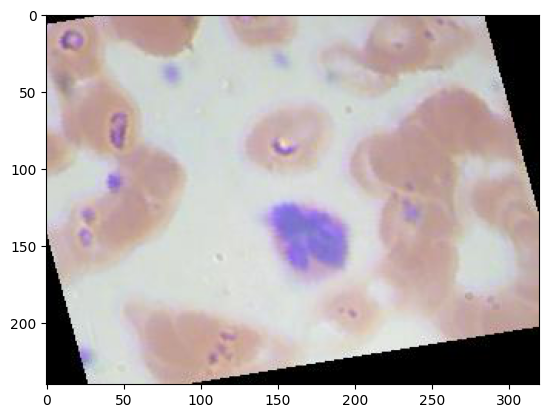

In [3]:
import matplotlib.pyplot as plt
im=plt.imread('/content/drive/MyDrive/blood cell/dataset2-master/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_9_4276.jpeg')
plt.imshow(im)
plt.show()

In [4]:
import os
import random
import matplotlib.pyplot as plt

In [5]:
class_names=['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL']

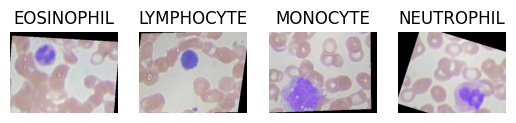

In [6]:
import os
import random
import matplotlib.pyplot as plt

class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
images = []

img ='/content/drive/MyDrive/blood cell/dataset2-master/dataset2-master/dataset2-master/images/TRAIN'

# Loop through all class names and pick a random image for each class
for class_name in class_names:
    class_path = os.path.join(img, class_name)
    image_files = os.listdir(class_path)
    if image_files:  # Check if the list is not empty
        image_file = random.choice(image_files)
        image_path = os.path.join(class_path, image_file)
        images.append(image_path)

# Loop through all the images and display them in the subplot
fig, ax = plt.subplots(1, 4)  # Changed subplot to have 4 subplots
for i in range(len(images)):  # Use len(images) to loop through the available images
    img = plt.imread(images[i])
    ax[i].imshow(img)
    ax[i].set_title(class_names[i])
    ax[i].axis('off')

plt.show()  # Added plt.show() to display the plot


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define image dimensions
image_width, image_height = 150, 150

# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Generate training set
# Path to the dataset
dataset_path = '/content/drive/MyDrive/blood cell/dataset2-master/dataset2-master/dataset2-master/images/TRAIN'
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

Found 6660 images belonging to 4 classes.


In [21]:
# Generate validation set
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 0 images belonging to 4 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 6660 images belonging to 4 classes.


In [17]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = Xception(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 8,196
Non-trainable params: 20,861,480
_________________________________________________________________


In [23]:
# Train the model
history = model.fit(train_generator, epochs=5)


Epoch 1/5
105/105 [==============================] - 491s 5s/step - loss: 0.8869 - accuracy: 0.5974
Epoch 2/5
105/105 [==============================] - 411s 4s/step - loss: 0.7462 - accuracy: 0.6902
Epoch 3/5
105/105 [==============================] - 406s 4s/step - loss: 0.6736 - accuracy: 0.7401
Epoch 4/5
105/105 [==============================] - 403s 4s/step - loss: 0.6360 - accuracy: 0.7485
Epoch 5/5
105/105 [==============================] - 406s 4s/step - loss: 0.5959 - accuracy: 0.7706


In [25]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

105/105 [==============================] - 404s 4s/step - loss: 0.5710 - accuracy: 0.7881
Test Loss: 0.5710083246231079
Test Accuracy: 0.7881381511688232
